In [1]:
import pandas as pd
import numpy as np
import os

In [14]:
#import dataframe: 
df = pd.read_csv("../data/raw/sansrit_ML_15min.txt", sep="\t")

In [15]:
df

,timestamp_ms,ECG,Unnamed: 2,PPG
0,0.000,0.008698,0.005493,NaN
1,0.001,0.008545,0.004883,NaN
2,0.002,0.008698,0.000610,NaN
3,0.003,0.008850,0.000305,NaN
4,0.004,0.008850,0.000610,NaN
...,...,...,...,...
899996,899.996,-0.016480,0.097961,NaN
899997,899.997,-0.015717,0.098267,NaN
899998,899.998,-0.014343,0.097656,NaN
899999,899.999,-0.012970,0.097656,NaN


In [16]:
df = df.rename(columns={"Unnamed: 2": "PPG_"})

In [17]:
df

,timestamp_ms,ECG,PPG_,PPG
0,0.000,0.008698,0.005493,NaN
1,0.001,0.008545,0.004883,NaN
2,0.002,0.008698,0.000610,NaN
3,0.003,0.008850,0.000305,NaN
4,0.004,0.008850,0.000610,NaN
...,...,...,...,...
899996,899.996,-0.016480,0.097961,NaN
899997,899.997,-0.015717,0.098267,NaN
899998,899.998,-0.014343,0.097656,NaN
899999,899.999,-0.012970,0.097656,NaN


In [18]:
df = df.rename(columns={"PPG": "label"})

In [19]:
df

,timestamp_ms,ECG,PPG_,label
0,0.000,0.008698,0.005493,NaN
1,0.001,0.008545,0.004883,NaN
2,0.002,0.008698,0.000610,NaN
3,0.003,0.008850,0.000305,NaN
4,0.004,0.008850,0.000610,NaN
...,...,...,...,...
899996,899.996,-0.016480,0.097961,NaN
899997,899.997,-0.015717,0.098267,NaN
899998,899.998,-0.014343,0.097656,NaN
899999,899.999,-0.012970,0.097656,NaN


In [20]:
df = df.rename(columns={"PPG_": "PPG"})

In [21]:
df

,timestamp_ms,ECG,PPG,label
0,0.000,0.008698,0.005493,NaN
1,0.001,0.008545,0.004883,NaN
2,0.002,0.008698,0.000610,NaN
3,0.003,0.008850,0.000305,NaN
4,0.004,0.008850,0.000610,NaN
...,...,...,...,...
899996,899.996,-0.016480,0.097961,NaN
899997,899.997,-0.015717,0.098267,NaN
899998,899.998,-0.014343,0.097656,NaN
899999,899.999,-0.012970,0.097656,NaN


In [26]:
df["time_sec"] = df.index / 1000.0

In [27]:
df

,timestamp_ms,ECG,PPG,label,time_sec
0,0.000,0.008698,0.005493,NaN,0.000
1,0.001,0.008545,0.004883,NaN,0.001
2,0.002,0.008698,0.000610,NaN,0.002
3,0.003,0.008850,0.000305,NaN,0.003
4,0.004,0.008850,0.000610,NaN,0.004
...,...,...,...,...,...
899996,899.996,-0.016480,0.097961,NaN,899.996
899997,899.997,-0.015717,0.098267,NaN,899.997
899998,899.998,-0.014343,0.097656,NaN,899.998
899999,899.999,-0.012970,0.097656,NaN,899.999


In [28]:
# label ranges (in seconds)
label_ranges = [
    (0,   120, 0),   # 0–2 min
    (120, 180, 1),   # 2–3 min
    (180, 300, 0),   # 3–5 min
    (300, 360, 2),   # 5–6 min
    (360, 480, 0),   # 6–8 min
    (480, 540, 3),   # 8–9 min
    (540, 660, 0),   # 9–11 min
    (660, 720, 1),   # 11–12 min
    (720, 840, 0),   # 12–14 min
    (840, 900, 3),   # 14–15 min
]

In [29]:
def assign_label(t):
    for start, end, label in label_ranges:
        if start<=t<end:
            return label
    return -1 



In [30]:
df["label"] = df["time_sec"].apply(assign_label)

In [31]:
df

,timestamp_ms,ECG,PPG,label,time_sec
0,0.000,0.008698,0.005493,0,0.000
1,0.001,0.008545,0.004883,0,0.001
2,0.002,0.008698,0.000610,0,0.002
3,0.003,0.008850,0.000305,0,0.003
4,0.004,0.008850,0.000610,0,0.004
...,...,...,...,...,...
899996,899.996,-0.016480,0.097961,3,899.996
899997,899.997,-0.015717,0.098267,3,899.997
899998,899.998,-0.014343,0.097656,3,899.998
899999,899.999,-0.012970,0.097656,3,899.999


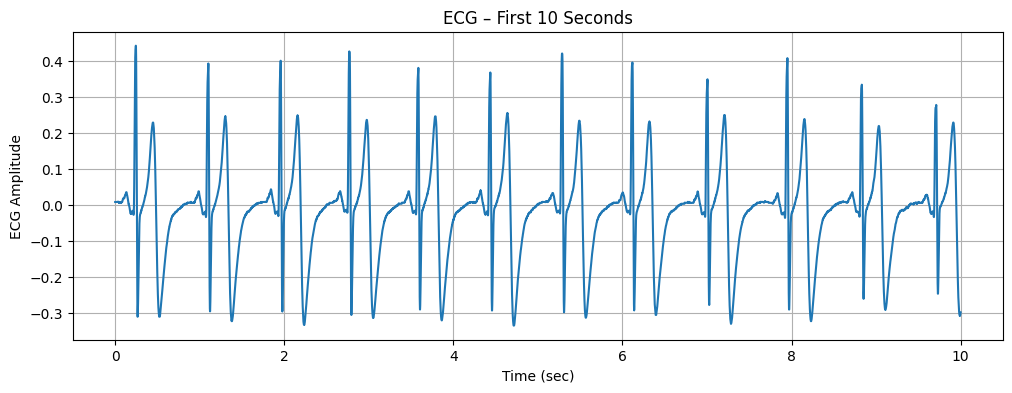

In [34]:
import matplotlib.pyplot as plt

# Assuming df already loaded and has columns: time_sec, ECG

# Extract first 10 seconds (0 to 10,000 samples)
df_10s = df[df["time_sec"] <= 10]

plt.figure(figsize=(12, 4))
plt.plot(df_10s["time_sec"], df_10s["ECG"])
plt.title("ECG – First 10 Seconds")
plt.xlabel("Time (sec)")
plt.ylabel("ECG Amplitude")
plt.grid(True)
plt.show()


In [35]:
df_out = df[["time_sec", "ECG", "PPG", "label"]]

In [36]:
df_out

,time_sec,ECG,PPG,label
0,0.000,0.008698,0.005493,0
1,0.001,0.008545,0.004883,0
2,0.002,0.008698,0.000610,0
3,0.003,0.008850,0.000305,0
4,0.004,0.008850,0.000610,0
...,...,...,...,...
899996,899.996,-0.016480,0.097961,3
899997,899.997,-0.015717,0.098267,3
899998,899.998,-0.014343,0.097656,3
899999,899.999,-0.012970,0.097656,3


In [37]:
df_out.to_csv("Labeled_ecg.csv", index=False)